In [1]:

!pip install pyLDAvis

c:\users\dito\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 -8.945382060067354 0.6782693639817787
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.9619   
1            1             1.0              0.9805   
2            2             4.0              0.9901   
3            3             0.0              0.2000   
4            4             2.0              0.9901   
5            5             2.0              0.9805   
6            6             4.0              0.9869   
7            7             1.0              0.9805   
8            8             4.0              0.9950   
9            9             4.0              0.9901   

                                            Keywords  \
0  love, happy, dirumahaja, been, can, don, know,...   
1  love, happy, dirumahaja, been, can, don, know,...   
2  qwq, surabaya, idk, much, punten, alhamdulilla...   
3  art, furryart, ibispaintx, ibispaint, drawing,...   
4  ship, coach, sakit, indomusikgram, lombokvidgr...   
5  ship, coach, sakit, indomu

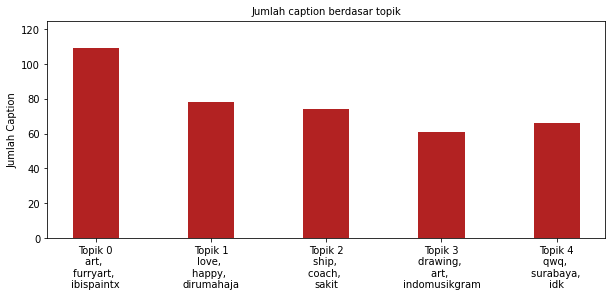

In [20]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
caption
Cari keringat💦🥋🇮🇩
Alam dengan udara yang segar, gaesss🌤️🥀🌷🌺🌸
🏃🏃🏃🌤️🌤️🌤️
With Sensei Armand ,Oss 🥋
Start to action 🥋🥋
"My Belt, My Spirit, My Determination
My Love for Karate"
Siswa-Siswi Berprestasi Surabaya 2019, bersama Kadiknas Kota Surabaya 🇮🇩
Hai sahabat dispendik Surabaya
Alhamdulillah foto pegang piala Juara Umum Jatim O2SN 2019, di Semarang.
Salam ibu-ibu, ingat di Semarang 2019
selalu sabar
Yang mau cari nama ff
Habis spin dapet scar MEGALODON alpha
SALAM SATU KOMANDO NKRI HARGA MATI
"TUKU SEMANGGI NDUK JOYOBOYO
AYO DUKUNG TERUS UMKM SUROBOYO"
SAYA ALUMNI SMK NEGERI 12 SURABAYA MENGUCAPKAN SELAMAT MERAYAKAN PASKAH 4 APRIL 2021
SELAMAT DAN SUKSES ACARA RAKORWIL
SAYA MENGUCAPKAN SUKSES KAN SATKORWIL BANSER JAWA TIMUR
SALAM PERGERAKAN
Tari Asmara Putri Kirana 💃
Tari Niskala Seblang 💃💃💃
"Keseruan bersama teman2 @chandra.manganti 😍🥰😘
#28032021
#Photoshoot
#SanggarTariChandraManganti"
"Tari Ning Saropah 💃💃💃
#03042021
#SanggarTariChandraManganti
#FirstWinnerForGroup🏆🥇
#LombaTariNusantara
#KDCEO"
"Terima kasih bimbingannya @rioanggara83 untuk putri2 kami 😊🙏
Terima kasih doa & dukungannya teman2 @chandra.manganti 😍🥰😘
#03042021
#SanggarTariChandraManganti
#TariSaropah
#FirstWinnerForGroup
#TariSilihWarni
#FirstWinnerForSingle
#LombaTariNusantara
#KDCEO"
"#28032021
#Photoshoot
#SanggarTariChandraManganti"
"Behind the scene 🤭
#24032021"
Miss U so much, pa..... 😓😢😭
My Princess Nabila @nabilashakiraa_ 😍🥰😘
Nabila @nabilashakiraa_ 'n friends 😍🥰😘
My Princess Nabila 😍🥰😘
Loyo
less happy😃
Culture 🤗
Kidding 😁
mbuh
Cah ndeso seng gelek di paedo😊
Dimana bumi kita pijak langit kita junjung😅
Serasa dunia terbalik
This really
My family
Kenangan dinner di pandemi begini
Jangan lupa bahagia 💋💋💋
Jangan lupa bahagia 😘😘😘
"Morning cantikkk... Selamat beraktivitas
Love you all ❤💋"
"Lagi pengacara yaudah mainan
#brushchallange aja 😍😘😚"
"Cantiknya seorang muslimah 😇
#Tetapistiqomah"
My sisters 🙆🙆🙆
Pipi udah kayak bakpao cikyen aja 😉😉😉
Senyumin aja... Siapa tau jodoh? 🤗🤗🤗
WELL DONE ☺
"A drawing I made for a contest. With my OC Theo and Ashe#oc #originalcharacter #ibispaintx
(That moment when you don't know what are you doing so you just slap tons of overlay layer and hope it will look good :'))"☺️.
Sewot
Abaikan yg di belakang 🐾
2021🦋💫
🦕🌼
🦕🌻
"Miss U cantik"
heyy
so cool
babe
wings
𝘐 𝘮𝘪𝘴𝘴 𝘵𝘩𝘦 𝘰𝘭𝘥 𝘮𝘦 ;)
🆙
punten-🤓❤️ @winda_uhuyy @gisya21 @airaakcll_ #hunting #bestfriends #xixixi
"음악을 공부하고 듣는 것이 나의 습관😂
#koreahangul #belajarbahasakorea #vscenerylyrics #bighit_official_bts #armyindonesia♥"
"𝐓𝐡𝐞 𝐠𝐞𝐧𝐠🤍
𝐙𝐞𝐩𝐞𝐭𝐨:𝐋𝐢𝐬𝐩𝐮𝐭_09
#𝐙𝐞𝐩𝐞𝐭𝐨 #𝐆𝐞𝐧𝐠𝐙𝐞𝐩𝐞𝐭𝐨 #𝐆𝐞𝐧𝐠"
𝐊𝐨𝐫𝐞𝐚🙇‍♀️🙆‍♀️.
Sneng Bnget🥺🤍. #siwonchoi #miesedap #dirumahsaja
🍍 #dirumahaja
"Berempat pun jadi🥺🤍.
@airaakcll_ @winda_uhuyy @gisya21 #bestie"
up:) #dirumahsaja
Happy 13-Day Me🥳💕 #happybirthday #happybirthdaytome #btsxarmyindonesia
gbtz :) #dirumahaja
Akhirnya Lulus🥺alhamdulilah🤲. #lulus2020 #perpisahan2020 #samasamadirumah #dirumahaja
EehhKumpul😂🥺❤️. #dirumahaja
pss :vVv
.hehehe:) #dirumahaja.
up💅:)
I don't no
Bapakkuu pernah bilang kalo makan pakai mulut ya
A silent night
Kongkalikong sindikat kingkong
No caption
oute goes #3 @_rvamk @infoareakediri
⚽⚽
Do you see what i see
there are snakes in your shoes
Sisa LDKS
loloh wk
In frame happy
The end
mama just killed man
Price tag
Merem melek
Lucunya
"Video UH Bahasa Jawa tentang Bawang Putih dan Bawang Merah Nama: Ahmad Meidaffa Prasetyo Kelas/No absen: 7M/04 @anysyafriany16"
Masa lalu
Udah agak lama
SCHOOL
Keren ....
Nari di prima rasa ..
Belajar menari
Nirwana waterpark lombok
Keren Trimakasi om
Dapet Foto bersama kakak @hasaanjaber di @nirwanawaterparklombok6
Ayoooo di folow di like dan komentar positifnya nggih di intagram @officialputeriremajantb .. aliya nur sabrina 😍😍😍😍
Kumpul Lebaran bersama keluarga besar di sakra beberapa tahun yg lalu di rumah almarhum TGH. zainal abidin ali ...
Belajar ..
Nusa tenggara barat .. @officialputeriremajantb @officialputeriremajaindonesia
March 11, 2021-Haechan’s Michael jackson pose
So cool❤️
Make a wish 🖤 @nct #nct #makeawishchallenge🧞‍♂️
☎️
🤍Happy Birthday 🎂 To my sis👱🏻‍♀️WOW 21🔳
🍍🍍🌈
Certi from maechan
First certi from 4k clan
end game😉😉
wait what happened🤔
the new sniper is 🔥
Punten
✨
I've got so much love, got so much patience, I've learned from the pain, I turned out amazing🌙
tryin to get a fair-y life🤷🏻
gonna regret this later cause it kinda sounds weird ig
ijo
🧍🏻‍♀️🤳🏻
it’s been a while lol ^^ blue jeans - @ganggaksm
Video pertama pake piyama!🤠 // #PuraPuraLupa - @petrusmahendra #indomusikgram @indomusikgram
Here is the better version!🥱 // La la lost you - @nikizefanya #indomusikgram @indomusikgram
@indomusikgram #indomusikgram @lombokvidgram #lombokvidgram
buru - buru bgt buatnya, jadinya gini deh🥴@indomusikgram #indomusikgram @lombokvidgram #lombokvidgram
Lagi sariawan, hehe🙆🏻‍♀️ #indomusikgram @indomusikgram #lombokvidgram @lombokvidgram #matakehati @sayhivi
champions🏆
Mantar/17/03/20
Asiikkk
Sun☀️ and grass 🌿
Morn be💙🌤️ #mirorselfie
Nu b ivag ant🌞 #goldenhour #meresehill #lombokisland
silauuu sekali #lombokexplore #lombokexperience #lomboknesia#lombokisland #ootdstyleremaja
wondering if you were ever coming around
🦋 𝐵𝑒𝒶𝒸𝒽.𝓈𝑜 𝑔𝑜𝑜𝒹. 🌊
𝑰'𝒗𝒆 𝒇𝒐𝒖𝒏𝒅 𝒎𝒚 𝒉𝒂𝒑𝒑𝒚 𝒑𝒍𝒂𝒄𝒆 💚
𝓨𝓸𝓾 𝓼𝓱𝓸𝓾𝓵𝓭 𝓯𝓮𝓮𝓵 𝓰𝓻𝓪𝓽𝓮𝓯𝓾𝓵, 𝓫𝓮𝓬𝓪𝓾𝓼𝓮 𝔂𝓸𝓾 𝓼𝓽𝓲𝓵𝓵 𝓱𝓪𝓿𝓮 𝓪 𝓬𝓱𝓪𝓷𝓬𝓮 𝓽𝓸 𝔀𝓪𝓽𝓬𝓱 𝓼𝓾𝓷𝓼𝓮𝓽 𝓮𝓿𝓮𝓻𝔂𝓭𝓪𝔂.
𝑾𝒆𝒂𝒓𝒊𝒏𝒈 𝒄𝒖𝒕𝒆 𝒅𝒓𝒆𝒔𝒔🦋🥰
Glow and grow upp🦋🦋
𝐛𝐞𝐬𝐭 𝐟𝐞𝐞𝐥𝐢𝐧𝐠 𝐞𝐯𝐞𝐫 𝐰𝐢𝐭𝐡 𝐛𝐞𝐚𝐜𝐡, 𝐬𝐮𝐧𝐬𝐞𝐭 𝐚𝐧𝐝 𝐰𝐢𝐧𝐝 🤍#sunsetlovers #lombok_hits_nesia #lombokexplore #lomboktrip
congratulations❤ 6years🎇. 17/6/17
pas di depan kamera kok
Dear sibling, when we can trip again?😜
Egaa😍😍
welcome to my house😍
there’s a hope that’s waiting for u in the dark
14✨
I want to pull the boat to help the orangutans out of the frame😭
🌚
Hasil ss;)
😘
Ft.bedel
Ciee yg ultahh @lalalalisa_m
Jan kaget d slide terakhir
Ya ada penampakan bayangan putih🙃
Ini namanya SIMITH pake H
Ini MIFTAHH QQ
The biskuat
livin’🦋
ⁿᵉᵃʳ ˡⁱᵍʰᵗ💫
⚡best leader⚡
Ochi terlalu gemoy..........#treasure #yoshinori #kpop #treasuremaker #teumeindonesia
say that u love me #taeyongnct #nctedit #nct127 #kpopedit #leetaeyong
Merendah untuk meroket 🌾🔥
"Awali dengan ""Bismillah"" dan akhiri dengan ""Hamdallah""
#jangankasikendor💪💪
#golkiper #kiper
@satyafootballclub"
"Sebuah KBERHASILAN YG di CAPAI BUKANLAH KARENA KITA YG HEBAT MELAINKAN KARENA ALLAH SWT YG MENOLONG KITA ATAS KEBAIKAN DAN DOA KITA SEWAKTU BERIBADAH. 🙏🏻....
#doublewinner
#menporacup2019
#timnasu16
#timnaspelajaru15"
"1000 penyelamatan akan kalah dengan 1 kesalahan⚽#kiperbolaindonesia#nevergiveup#kiperindonesiabersatu#kiperindonesia"
🎉14 y.o🎉
Dalam posisi apapun jangan biarkan emosimu mengalahkan kecerdasanmu🔥
"You'll be gone by @yonkagor
He's amazing >w<
His song is on youtube!! Check it out, its great qwq
Btw I hope you like my new drawing :D
Enjoy(?) I guess qwq
.
.
.
#art #drawing #fanart #ibispaint #ibispaintx #jonkagor #jonkagorfanart #youllbegone #music #cat #cathuman #catdrawing #animedrawings #animeart #digitaldrawing #digitalart #furryart #furry #trashart"
"I havent post anyting in a while soo...
Idk I just draw this and I was like
""Aw thats kinda cute""
Soo yeah, hope you like it qwq
Also this is Twig from hilda qwq
I love whatchinf that...
#art #drawing #animedrawings #furryart #furrydrawing #ibispaint #ibispaintx #trashart #bored #randomdrawing #tomuchhashtags #hilda #twig #twighilda #twigart #foxart #fox #white #whitefox #deer #deerfox #whitedeer"
"Happy pocky day everyone :D
So I was actually bored 2 months ago and I was thinking about drawing my oc and @naowo__ oc together, and I want to post it but idk when and thats when I relize there is a pocky day, so I want to post it today :D...
Hope ya'll like it QwQ...
#art #drawing #digitaldrawing #digitalart #fanart #ship #animedrawings #animeart #catart #cathuman #baddrawing #gay #lesbian #pocky #pockysticks #pockyday #pockygame"
"It's Normal by @jonkagor :D
I hope you like it ^^
It look nothing like Jon QmQ
Me sad with the result qmq...
But me happy if you think the drawing is not bad :D...
#art #drawing #digitaldrawing #digitalart #ibispaint #ibispaintx #catart #cathuman #cat #furryart #furrydrawing #jonkagorfanart #jonkagor #trashart #itsnormal #hope"
"HELLO EVERYONE THIS IS WEIRD I KNOW LMAO--
Anyway these are a child of my OC Casey and my Friend @naowo__ OC name well- Nao
We name him Kurro (we dunno what other name we could think of so whatever)
Also we are not simp -_-
We just like to ship both of our OC together :D
They are cute together UwU💜
Anyway hope you enjoy :D
Sorry if the art is bad
ALSO THE FRIKING HAND IS SO HARD TO DRAW SO I GAVE UP ON IT SKSKSKSK
My art is trash, I know...
Dont ship us, ship our OC only
I am Bisexual and can like girls but she is just my friend and well she is straight =w=""...
#art #drawing #digitaldrawing #digitalart #fanart #ship #animedrawings #animeart #catart #cathuman #baddrawing #gay #lesbian #child #chilldren"
"Random art again QwQ
I dont know what to draw anyone have a Suggestion?.
Hope ya'll like it :'3
#pokemon #scorbunny #art #drawing #ibispaint #digitaldrawing #digitalart #pokemonart #scorbunnyart #animalart #animaldrawing #animedrawings #animeart #bunny #rabbit"
"I make a fanart of Mafumafu
Do you like it 👀👉👈?
I just hope you like it :D
#art #drawing #digitalart #digitaldrawing #ibispaint #ibispaintx #animalart #animaldrawing #furryart #furrydrawing #mafumafu #mafumafuutaite #mafuteru #utaitefanart #まふまふ #artwork #fanart #utaite #utaitefanart #devil #fox #foxart #catart #cathuman #cat #trashart #haventpostedinawhile #pleaselike #pleasefollowme #pleasesupport #tomuchhashtags"
"This morning on 14 september 2020
My pet Melly Mafuyu has pass away
He died from a fight to a wild cat
His body was found in front of my house
I'm truly am sad when I heard the news from my mother so I just cried all morning
But I feel a bit better now because the help of my friend
I thank you for the people that help me to calm down 🙏
Melly was the best cat that I ever own he has been there to support me when I was sad, he has been with me for time to time and I thank you for the thing that he have done to me, I cant do anything to save you on that time, I'm sorry for the time that I ignore you, sorry for all the thing I did wrong to you 😔🙏 I hope you can forgive me for that
I will allways remember you melly
I wish you are doing well on the other side
I love you melly 😔💜
#art #drawing #catart #catdrawing #ibispaint #ibispaintx #pleasesupport #lostpets #restinpeace #catdeath #deathart #furryart #furrydrawing #animedrawings #animeart #animal #animalart #animaldrawing #cat #night #nightsky #death #pleaselike #pleasefollowme #ihopeyoulikeit #goodbye"
"Some random art :D
I'm so bored by this day :'
Hope u like it TwT
#art #drawing #digitaldrawing #digitalart #trashart #furryart #furrydrawing #furry #idkwhatidrew #idkwhatimdoing #ibispaint #ibispaintx #awfulldrawing #catdrawing #animedrawings #tomuchhashtags #keselekangin"
"@naowo__ as a boy :D
Hope u like it :D
Oh wait you will not like it--
BUT YOU'LL LOVES IT >:D
Idk actually =w=""
Yey trash art
#art #drawing #digitaldrawing #digitalart #ibispaint #ibispaintx #cathuman #cat #furryart #furrydrawing #girlasboy #fanart #love #haventpostedinawhile #pleasefollowme #animedrawings #animeart #trashart #help"
My team,gak jelas banget sy🤣,#GABUT
Sekali2 upload game play,maaf video nya agak burem & aimnya masih kuning,masih nob🙏✌️
Pagi✌️
Ada yg mau masuk guild unlimited 4G? Mumpung lagi open member ,kalo berminat chat no wa yg terterai di sana
Malem ✌️,
Pagi✌️,KE KARANG MEKAR BELI MOLEN SCAR KOK GOLDEN?😂
#GABUT
Malem✌️,moon maap ni yg ngeliat hati2 matanya sakit🤣
Kasi nilai ya😂
Mantap
My lope lope koe
"Latihan online selama pademi corona
@keisya_auraf
@keisyalol"
Skrang fokus Unas smoga yg terbaik dri yg terbaik.Amin
Open p Po lgi yaa gess.
Allhamdulillah tambah semangat lagi yaa lee untuk PORPROP. Amin.
Terimakasih ya allah Semoga amanah berkah dunia dan akhirat amin selamat ya
Elastic girl #gresiksatusemangat
Follow share mobile legends terbaik
Tj4nt3k
Mandiribund🙃🤳
Bocilkagakbisaapa"😽✌️
"2thn yng lalu
Yng masi unyu unyu😂😂"
📍Rambutpendekgw:"
"gw butuh teman yng
Bisa nyenengin gw
Tapi siapa?🙃"
Kgak bisa gaya🙄🧐
Gtau ahh mls🙃
SOFISAHA?
Mita✌️
Sopisipa🥴
🥰punten
Aisha nih boss😎
Uwuu😍
Uwwu
Sofi siva77
"Alhamdulillah juara 1 di Lawang Malang Fossbi
#go to Jakarta 🏆🏆🤲"
"dola @ustonawawi9 @mokhamad_syaifuddin
15 ming"
"Terimakasih untuk para idola dan pelatih @cr_uuhuyy @mokhamad_syaifuddin @ustonawawi9
Untuk bimbingan nya🤲🙏⚽
Dan akhirnya TURNAMEN ASTON VILLA CUP
team GM SBY PEMENANGNYA......
We are the Champions 🏆🎉🎉🎉⚽⚽⚽#wani
#sepakbolaanakusiadini
#sepakbolausiadini"
Alhamdulillah juara 1#GeloraMuda
UNIKA nihh bosss😎😎
Bajol ijo ❤️⚽🔥
etelah melalui perjuangan yg cukup melelahkan..... akhirnya PIALA ini ditangan juga.....WE ARE THE CHAMPIONS 👏👏👏👏👏🤲
Sama mas @oktafianusfernando
You are My Hero.....🤗🤗🤗🤗 I hope my hero is always healthy, thank you for everything you do for me🤲🤲🤲🤲
"sai pertandingan...... bersama coach BAJOL IJO @COACH ROCHIM
Terimakasih coach 🤲🏆
#bajolijo
#askotpssisurabaya
#askotsurabaya
#sepakbolaanakindonesia
#sepakbolausiadini"
"Gielang Fitrawan Mukhlish 7L/30
Banyak cara untuk mengurangi risiko terkena virus corona. Salah satunya adalah Mencuci tangan, tidak berkontak langsung dengan orang yang sakit, menggunakan masker, dan lain lain.
Stay safe ya!
#tugasbelajardirumahsenibudayaspensa
#staysafe
#stayathome
@faryp04"
"PURNAWIDYA!!!
#purnawidyamuhlas2019"
he Real Battle Final JRC9 PENS 2018
Mecbot Jogja | 16-17 December 2017
Itu sifat bertiga:)
Turut berduka cita
Jomblo:)
Lebih baik sendiri👍
Jalan2 ke istana sakura
jan ditemenin kita suka nya classican,,🤫🤫🤫
"Classic doang kok ini:)
#odettemlbb #havefun #mobilelegendsindonesia #mageuser"
Keep smile:)
I don't know when this virus went away. The only one who knows is God🙂✨
never give up, reach your goals
My Best friends 🧒👦


















""".split("\n")[1:-1]


stopword = ['dan','ketika','akan','dengan','the','akan','the','you','and','for','kita','that','help','are','when','was','jangan','want','just','his','lain','untuk','hope','like','sanggartarichandramanganti','but','this','ini','karena','what','was','lalu','time','kok','kalo','must','from','ijo','yang']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,4))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah caption berdasar topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Caption')
ax1.set_ylim(0, 125)


plt.show()

c:\users\dito\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 -8.686479455408065 0.5650107507120853
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.9619   
1            1             0.0              0.9805   
2            2             2.0              0.9934   
3            3             0.0              0.2000   
4            4             3.0              0.9901   
5            5             0.0              0.9805   
6            6             4.0              0.9869   
7            7             0.0              0.9869   
8            8             2.0              0.9950   
9            9             2.0              0.9901   

                                            Keywords  \
0  art, dirumahaja, just, ship, like, pocky, digi...   
1  you, hope, like, the, for, sanggartarichandram...   
2  ibispaint, drawing, art, furryart, ibispaintx,...   
3  you, hope, like, the, for, sanggartarichandram...   
4  art, dirumahaja, just, ship, like, pocky, digi...   
5  you, hope, like, the, for,

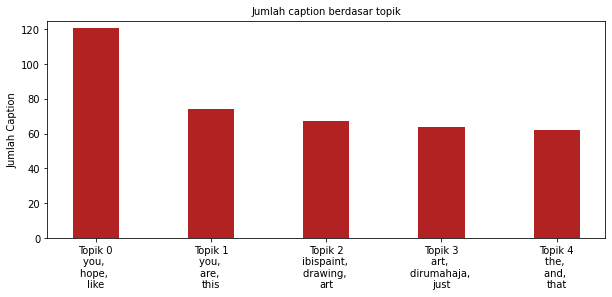

In [21]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
caption
Cari keringat💦🥋🇮🇩
Alam dengan udara yang segar, gaesss🌤️🥀🌷🌺🌸
🏃🏃🏃🌤️🌤️🌤️
With Sensei Armand ,Oss 🥋
Start to action 🥋🥋
"My Belt, My Spirit, My Determination
My Love for Karate"
Siswa-Siswi Berprestasi Surabaya 2019, bersama Kadiknas Kota Surabaya 🇮🇩
Hai sahabat dispendik Surabaya
Alhamdulillah foto pegang piala Juara Umum Jatim O2SN 2019, di Semarang.
Salam ibu-ibu, ingat di Semarang 2019
selalu sabar
Yang mau cari nama ff
Habis spin dapet scar MEGALODON alpha
SALAM SATU KOMANDO NKRI HARGA MATI
"TUKU SEMANGGI NDUK JOYOBOYO
AYO DUKUNG TERUS UMKM SUROBOYO"
SAYA ALUMNI SMK NEGERI 12 SURABAYA MENGUCAPKAN SELAMAT MERAYAKAN PASKAH 4 APRIL 2021
SELAMAT DAN SUKSES ACARA RAKORWIL
SAYA MENGUCAPKAN SUKSES KAN SATKORWIL BANSER JAWA TIMUR
SALAM PERGERAKAN
Tari Asmara Putri Kirana 💃
Tari Niskala Seblang 💃💃💃
"Keseruan bersama teman2 @chandra.manganti 😍🥰😘
#28032021
#Photoshoot
#SanggarTariChandraManganti"
"Tari Ning Saropah 💃💃💃
#03042021
#SanggarTariChandraManganti
#FirstWinnerForGroup🏆🥇
#LombaTariNusantara
#KDCEO"
"Terima kasih bimbingannya @rioanggara83 untuk putri2 kami 😊🙏
Terima kasih doa & dukungannya teman2 @chandra.manganti 😍🥰😘
#03042021
#SanggarTariChandraManganti
#TariSaropah
#FirstWinnerForGroup
#TariSilihWarni
#FirstWinnerForSingle
#LombaTariNusantara
#KDCEO"
"#28032021
#Photoshoot
#SanggarTariChandraManganti"
"Behind the scene 🤭
#24032021"
Miss U so much, pa..... 😓😢😭
My Princess Nabila @nabilashakiraa_ 😍🥰😘
Nabila @nabilashakiraa_ 'n friends 😍🥰😘
My Princess Nabila 😍🥰😘
Loyo
less happy😃
Culture 🤗
Kidding 😁
mbuh
Cah ndeso seng gelek di paedo😊
Dimana bumi kita pijak langit kita junjung😅
Serasa dunia terbalik
This really
My family
Kenangan dinner di pandemi begini
Jangan lupa bahagia 💋💋💋
Jangan lupa bahagia 😘😘😘
"Morning cantikkk... Selamat beraktivitas
Love you all ❤💋"
"Lagi pengacara yaudah mainan
#brushchallange aja 😍😘😚"
"Cantiknya seorang muslimah 😇
#Tetapistiqomah"
My sisters 🙆🙆🙆
Pipi udah kayak bakpao cikyen aja 😉😉😉
Senyumin aja... Siapa tau jodoh? 🤗🤗🤗
WELL DONE ☺
"A drawing I made for a contest. With my OC Theo and Ashe#oc #originalcharacter #ibispaintx
(That moment when you don't know what are you doing so you just slap tons of overlay layer and hope it will look good :'))"☺️.
Sewot
Abaikan yg di belakang 🐾
2021🦋💫
🦕🌼
🦕🌻
"Miss U cantik"
heyy
so cool
babe
wings
𝘐 𝘮𝘪𝘴𝘴 𝘵𝘩𝘦 𝘰𝘭𝘥 𝘮𝘦 ;)
🆙
punten-🤓❤️ @winda_uhuyy @gisya21 @airaakcll_ #hunting #bestfriends #xixixi
"음악을 공부하고 듣는 것이 나의 습관😂
#koreahangul #belajarbahasakorea #vscenerylyrics #bighit_official_bts #armyindonesia♥"
"𝐓𝐡𝐞 𝐠𝐞𝐧𝐠🤍
𝐙𝐞𝐩𝐞𝐭𝐨:𝐋𝐢𝐬𝐩𝐮𝐭_09
#𝐙𝐞𝐩𝐞𝐭𝐨 #𝐆𝐞𝐧𝐠𝐙𝐞𝐩𝐞𝐭𝐨 #𝐆𝐞𝐧𝐠"
𝐊𝐨𝐫𝐞𝐚🙇‍♀️🙆‍♀️.
Sneng Bnget🥺🤍. #siwonchoi #miesedap #dirumahsaja
🍍 #dirumahaja
"Berempat pun jadi🥺🤍.
@airaakcll_ @winda_uhuyy @gisya21 #bestie"
up:) #dirumahsaja
Happy 13-Day Me🥳💕 #happybirthday #happybirthdaytome #btsxarmyindonesia
gbtz :) #dirumahaja
Akhirnya Lulus🥺alhamdulilah🤲. #lulus2020 #perpisahan2020 #samasamadirumah #dirumahaja
EehhKumpul😂🥺❤️. #dirumahaja
pss :vVv
.hehehe:) #dirumahaja.
up💅:)
I don't no
Bapakkuu pernah bilang kalo makan pakai mulut ya
A silent night
Kongkalikong sindikat kingkong
No caption
oute goes #3 @_rvamk @infoareakediri
⚽⚽
Do you see what i see
there are snakes in your shoes
Sisa LDKS
loloh wk
In frame happy
The end
mama just killed man
Price tag
Merem melek
Lucunya
"Video UH Bahasa Jawa tentang Bawang Putih dan Bawang Merah Nama: Ahmad Meidaffa Prasetyo Kelas/No absen: 7M/04 @anysyafriany16"
Masa lalu
Udah agak lama
SCHOOL
Keren ....
Nari di prima rasa ..
Belajar menari
Nirwana waterpark lombok
Keren Trimakasi om
Dapet Foto bersama kakak @hasaanjaber di @nirwanawaterparklombok6
Ayoooo di folow di like dan komentar positifnya nggih di intagram @officialputeriremajantb .. aliya nur sabrina 😍😍😍😍
Kumpul Lebaran bersama keluarga besar di sakra beberapa tahun yg lalu di rumah almarhum TGH. zainal abidin ali ...
Belajar ..
Nusa tenggara barat .. @officialputeriremajantb @officialputeriremajaindonesia
March 11, 2021-Haechan’s Michael jackson pose
So cool❤️
Make a wish 🖤 @nct #nct #makeawishchallenge🧞‍♂️
☎️
🤍Happy Birthday 🎂 To my sis👱🏻‍♀️WOW 21🔳
🍍🍍🌈
Certi from maechan
First certi from 4k clan
end game😉😉
wait what happened🤔
the new sniper is 🔥
Punten
✨
I've got so much love, got so much patience, I've learned from the pain, I turned out amazing🌙
tryin to get a fair-y life🤷🏻
gonna regret this later cause it kinda sounds weird ig
ijo
🧍🏻‍♀️🤳🏻
it’s been a while lol ^^ blue jeans - @ganggaksm
Video pertama pake piyama!🤠 // #PuraPuraLupa - @petrusmahendra #indomusikgram @indomusikgram
Here is the better version!🥱 // La la lost you - @nikizefanya #indomusikgram @indomusikgram
@indomusikgram #indomusikgram @lombokvidgram #lombokvidgram
buru - buru bgt buatnya, jadinya gini deh🥴@indomusikgram #indomusikgram @lombokvidgram #lombokvidgram
Lagi sariawan, hehe🙆🏻‍♀️ #indomusikgram @indomusikgram #lombokvidgram @lombokvidgram #matakehati @sayhivi
champions🏆
Mantar/17/03/20
Asiikkk
Sun☀️ and grass 🌿
Morn be💙🌤️ #mirorselfie
Nu b ivag ant🌞 #goldenhour #meresehill #lombokisland
silauuu sekali #lombokexplore #lombokexperience #lomboknesia#lombokisland #ootdstyleremaja
wondering if you were ever coming around
🦋 𝐵𝑒𝒶𝒸𝒽.𝓈𝑜 𝑔𝑜𝑜𝒹. 🌊
𝑰'𝒗𝒆 𝒇𝒐𝒖𝒏𝒅 𝒎𝒚 𝒉𝒂𝒑𝒑𝒚 𝒑𝒍𝒂𝒄𝒆 💚
𝓨𝓸𝓾 𝓼𝓱𝓸𝓾𝓵𝓭 𝓯𝓮𝓮𝓵 𝓰𝓻𝓪𝓽𝓮𝓯𝓾𝓵, 𝓫𝓮𝓬𝓪𝓾𝓼𝓮 𝔂𝓸𝓾 𝓼𝓽𝓲𝓵𝓵 𝓱𝓪𝓿𝓮 𝓪 𝓬𝓱𝓪𝓷𝓬𝓮 𝓽𝓸 𝔀𝓪𝓽𝓬𝓱 𝓼𝓾𝓷𝓼𝓮𝓽 𝓮𝓿𝓮𝓻𝔂𝓭𝓪𝔂.
𝑾𝒆𝒂𝒓𝒊𝒏𝒈 𝒄𝒖𝒕𝒆 𝒅𝒓𝒆𝒔𝒔🦋🥰
Glow and grow upp🦋🦋
𝐛𝐞𝐬𝐭 𝐟𝐞𝐞𝐥𝐢𝐧𝐠 𝐞𝐯𝐞𝐫 𝐰𝐢𝐭𝐡 𝐛𝐞𝐚𝐜𝐡, 𝐬𝐮𝐧𝐬𝐞𝐭 𝐚𝐧𝐝 𝐰𝐢𝐧𝐝 🤍#sunsetlovers #lombok_hits_nesia #lombokexplore #lomboktrip
congratulations❤ 6years🎇. 17/6/17
pas di depan kamera kok
Dear sibling, when we can trip again?😜
Egaa😍😍
welcome to my house😍
there’s a hope that’s waiting for u in the dark
14✨
I want to pull the boat to help the orangutans out of the frame😭
🌚
Hasil ss;)
😘
Ft.bedel
Ciee yg ultahh @lalalalisa_m
Jan kaget d slide terakhir
Ya ada penampakan bayangan putih🙃
Ini namanya SIMITH pake H
Ini MIFTAHH QQ
The biskuat
livin’🦋
ⁿᵉᵃʳ ˡⁱᵍʰᵗ💫
⚡best leader⚡
Ochi terlalu gemoy..........#treasure #yoshinori #kpop #treasuremaker #teumeindonesia
say that u love me #taeyongnct #nctedit #nct127 #kpopedit #leetaeyong
Merendah untuk meroket 🌾🔥
"Awali dengan ""Bismillah"" dan akhiri dengan ""Hamdallah""
#jangankasikendor💪💪
#golkiper #kiper
@satyafootballclub"
"Sebuah KBERHASILAN YG di CAPAI BUKANLAH KARENA KITA YG HEBAT MELAINKAN KARENA ALLAH SWT YG MENOLONG KITA ATAS KEBAIKAN DAN DOA KITA SEWAKTU BERIBADAH. 🙏🏻....
#doublewinner
#menporacup2019
#timnasu16
#timnaspelajaru15"
"1000 penyelamatan akan kalah dengan 1 kesalahan⚽#kiperbolaindonesia#nevergiveup#kiperindonesiabersatu#kiperindonesia"
🎉14 y.o🎉
Dalam posisi apapun jangan biarkan emosimu mengalahkan kecerdasanmu🔥
"You'll be gone by @yonkagor
He's amazing >w<
His song is on youtube!! Check it out, its great qwq
Btw I hope you like my new drawing :D
Enjoy(?) I guess qwq
.
.
.
#art #drawing #fanart #ibispaint #ibispaintx #jonkagor #jonkagorfanart #youllbegone #music #cat #cathuman #catdrawing #animedrawings #animeart #digitaldrawing #digitalart #furryart #furry #trashart"
"I havent post anyting in a while soo...
Idk I just draw this and I was like
""Aw thats kinda cute""
Soo yeah, hope you like it qwq
Also this is Twig from hilda qwq
I love whatchinf that...
#art #drawing #animedrawings #furryart #furrydrawing #ibispaint #ibispaintx #trashart #bored #randomdrawing #tomuchhashtags #hilda #twig #twighilda #twigart #foxart #fox #white #whitefox #deer #deerfox #whitedeer"
"Happy pocky day everyone :D
So I was actually bored 2 months ago and I was thinking about drawing my oc and @naowo__ oc together, and I want to post it but idk when and thats when I relize there is a pocky day, so I want to post it today :D...
Hope ya'll like it QwQ...
#art #drawing #digitaldrawing #digitalart #fanart #ship #animedrawings #animeart #catart #cathuman #baddrawing #gay #lesbian #pocky #pockysticks #pockyday #pockygame"
"It's Normal by @jonkagor :D
I hope you like it ^^
It look nothing like Jon QmQ
Me sad with the result qmq...
But me happy if you think the drawing is not bad :D...
#art #drawing #digitaldrawing #digitalart #ibispaint #ibispaintx #catart #cathuman #cat #furryart #furrydrawing #jonkagorfanart #jonkagor #trashart #itsnormal #hope"
"HELLO EVERYONE THIS IS WEIRD I KNOW LMAO--
Anyway these are a child of my OC Casey and my Friend @naowo__ OC name well- Nao
We name him Kurro (we dunno what other name we could think of so whatever)
Also we are not simp -_-
We just like to ship both of our OC together :D
They are cute together UwU💜
Anyway hope you enjoy :D
Sorry if the art is bad
ALSO THE FRIKING HAND IS SO HARD TO DRAW SO I GAVE UP ON IT SKSKSKSK
My art is trash, I know...
Dont ship us, ship our OC only
I am Bisexual and can like girls but she is just my friend and well she is straight =w=""...
#art #drawing #digitaldrawing #digitalart #fanart #ship #animedrawings #animeart #catart #cathuman #baddrawing #gay #lesbian #child #chilldren"
"Random art again QwQ
I dont know what to draw anyone have a Suggestion?.
Hope ya'll like it :'3
#pokemon #scorbunny #art #drawing #ibispaint #digitaldrawing #digitalart #pokemonart #scorbunnyart #animalart #animaldrawing #animedrawings #animeart #bunny #rabbit"
"I make a fanart of Mafumafu
Do you like it 👀👉👈?
I just hope you like it :D
#art #drawing #digitalart #digitaldrawing #ibispaint #ibispaintx #animalart #animaldrawing #furryart #furrydrawing #mafumafu #mafumafuutaite #mafuteru #utaitefanart #まふまふ #artwork #fanart #utaite #utaitefanart #devil #fox #foxart #catart #cathuman #cat #trashart #haventpostedinawhile #pleaselike #pleasefollowme #pleasesupport #tomuchhashtags"
"This morning on 14 september 2020
My pet Melly Mafuyu has pass away
He died from a fight to a wild cat
His body was found in front of my house
I'm truly am sad when I heard the news from my mother so I just cried all morning
But I feel a bit better now because the help of my friend
I thank you for the people that help me to calm down 🙏
Melly was the best cat that I ever own he has been there to support me when I was sad, he has been with me for time to time and I thank you for the thing that he have done to me, I cant do anything to save you on that time, I'm sorry for the time that I ignore you, sorry for all the thing I did wrong to you 😔🙏 I hope you can forgive me for that
I will allways remember you melly
I wish you are doing well on the other side
I love you melly 😔💜
#art #drawing #catart #catdrawing #ibispaint #ibispaintx #pleasesupport #lostpets #restinpeace #catdeath #deathart #furryart #furrydrawing #animedrawings #animeart #animal #animalart #animaldrawing #cat #night #nightsky #death #pleaselike #pleasefollowme #ihopeyoulikeit #goodbye"
"Some random art :D
I'm so bored by this day :'
Hope u like it TwT
#art #drawing #digitaldrawing #digitalart #trashart #furryart #furrydrawing #furry #idkwhatidrew #idkwhatimdoing #ibispaint #ibispaintx #awfulldrawing #catdrawing #animedrawings #tomuchhashtags #keselekangin"
"@naowo__ as a boy :D
Hope u like it :D
Oh wait you will not like it--
BUT YOU'LL LOVES IT >:D
Idk actually =w=""
Yey trash art
#art #drawing #digitaldrawing #digitalart #ibispaint #ibispaintx #cathuman #cat #furryart #furrydrawing #girlasboy #fanart #love #haventpostedinawhile #pleasefollowme #animedrawings #animeart #trashart #help"
My team,gak jelas banget sy🤣,#GABUT
Sekali2 upload game play,maaf video nya agak burem & aimnya masih kuning,masih nob🙏✌️
Pagi✌️
Ada yg mau masuk guild unlimited 4G? Mumpung lagi open member ,kalo berminat chat no wa yg terterai di sana
Malem ✌️,
Pagi✌️,KE KARANG MEKAR BELI MOLEN SCAR KOK GOLDEN?😂
#GABUT
Malem✌️,moon maap ni yg ngeliat hati2 matanya sakit🤣
Kasi nilai ya😂
Mantap
My lope lope koe
"Latihan online selama pademi corona
@keisya_auraf
@keisyalol"
Skrang fokus Unas smoga yg terbaik dri yg terbaik.Amin
Open p Po lgi yaa gess.
Allhamdulillah tambah semangat lagi yaa lee untuk PORPROP. Amin.
Terimakasih ya allah Semoga amanah berkah dunia dan akhirat amin selamat ya
Elastic girl #gresiksatusemangat
Follow share mobile legends terbaik
Tj4nt3k
Mandiribund🙃🤳
Bocilkagakbisaapa"😽✌️
"2thn yng lalu
Yng masi unyu unyu😂😂"
📍Rambutpendekgw:"
"gw butuh teman yng
Bisa nyenengin gw
Tapi siapa?🙃"
Kgak bisa gaya🙄🧐
Gtau ahh mls🙃
SOFISAHA?
Mita✌️
Sopisipa🥴
🥰punten
Aisha nih boss😎
Uwuu😍
Uwwu
Sofi siva77
"Alhamdulillah juara 1 di Lawang Malang Fossbi
#go to Jakarta 🏆🏆🤲"
"dola @ustonawawi9 @mokhamad_syaifuddin
15 ming"
"Terimakasih untuk para idola dan pelatih @cr_uuhuyy @mokhamad_syaifuddin @ustonawawi9
Untuk bimbingan nya🤲🙏⚽
Dan akhirnya TURNAMEN ASTON VILLA CUP
team GM SBY PEMENANGNYA......
We are the Champions 🏆🎉🎉🎉⚽⚽⚽#wani
#sepakbolaanakusiadini
#sepakbolausiadini"
Alhamdulillah juara 1#GeloraMuda
UNIKA nihh bosss😎😎
Bajol ijo ❤️⚽🔥
etelah melalui perjuangan yg cukup melelahkan..... akhirnya PIALA ini ditangan juga.....WE ARE THE CHAMPIONS 👏👏👏👏👏🤲
Sama mas @oktafianusfernando
You are My Hero.....🤗🤗🤗🤗 I hope my hero is always healthy, thank you for everything you do for me🤲🤲🤲🤲
"sai pertandingan...... bersama coach BAJOL IJO @COACH ROCHIM
Terimakasih coach 🤲🏆
#bajolijo
#askotpssisurabaya
#askotsurabaya
#sepakbolaanakindonesia
#sepakbolausiadini"
"Gielang Fitrawan Mukhlish 7L/30
Banyak cara untuk mengurangi risiko terkena virus corona. Salah satunya adalah Mencuci tangan, tidak berkontak langsung dengan orang yang sakit, menggunakan masker, dan lain lain.
Stay safe ya!
#tugasbelajardirumahsenibudayaspensa
#staysafe
#stayathome
@faryp04"
"PURNAWIDYA!!!
#purnawidyamuhlas2019"
he Real Battle Final JRC9 PENS 2018
Mecbot Jogja | 16-17 December 2017
Itu sifat bertiga:)
Turut berduka cita
Jomblo:)
Lebih baik sendiri👍
Jalan2 ke istana sakura
jan ditemenin kita suka nya classican,,🤫🤫🤫
"Classic doang kok ini:)
#odettemlbb #havefun #mobilelegendsindonesia #mageuser"
Keep smile:)
I don't know when this virus went away. The only one who knows is God🙂✨
never give up, reach your goals
My Best friends 🧒👦


















""".split("\n")[1:-1]


stopword = []
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,4))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah caption berdasar topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Caption')
ax1.set_ylim(0, 125)


plt.show()